## Submit job

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e84be-c80b-7c90-8000-c79232f5d8b7
job_status = succeeded  elapsed=26.954
sample: [{'mode': '', 'data': {'Q08': {'raw': {'I': [-0.5387510657310486, -0.4720752239227295, -0.18533183634281158, 0.06730176508426666, 0.30961108207702637, 0.3943285346031189, 0.3973555862903595, 0.23737016320228577, -0.07191000878810883, -0.33925265073776245, -0.5095095634460449, -0.49748092889785767, -0.34061530232429504, -0.12841865420341492, 0.16373956203460693, 0.4611584544181824, 0.4217005670070648, 0.30860960483551025, 0.11069323122501373, -0.11340360343456268, -0.3696115016937256, -0.477914035320282, -0.4205072820186615, -0.2725585103034973, 0.005538115277886391, 0.26538389921188354, 0.3827155828475952, 0.40208256244659424, 0.23000630736351013, 0.07838168740272522, -0.2182641327381134, -0.36961960792541504, -0.5001827478408813, -0.3575783669948578, -0.20116297900676727, 0.01750141568481922, 0.296531617641449, 0.34222233295440674, 0.2867775559425354, 0.15147778391838074, -0.08209915459156036,

## Plot

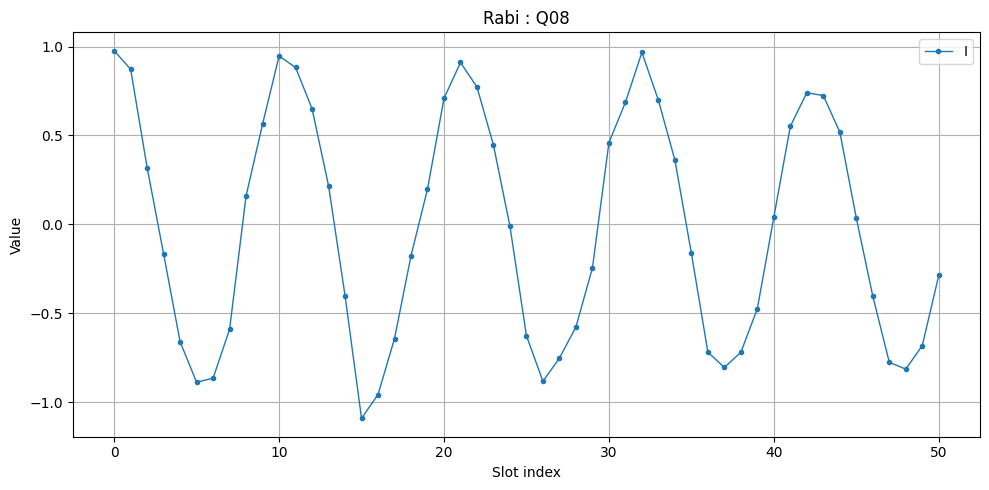

In [2]:
from oqtopus_sse_pulse.plotters import plot_payload

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)